In [1]:
# Import all necessary libraries.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from six.moves import urllib
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
# Workaround for downloading the MNIST data base.
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [3]:
# Read attributes and labels.
x = mnist["data"]
y = mnist["target"]

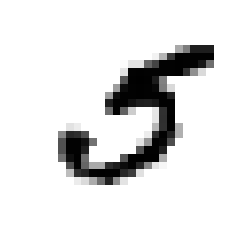

In [4]:
# Print a digit as example.
some_digit = x[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
# The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [6]:
# shuffle the training set.
shuffle_index = np.random.permutation(N)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Warning: the next cell may take hours to run, depending on your hardware.

In [7]:
# Warning: the next cell may take hours to run, depending on your hardware.
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}]

clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3, n_jobs=-1)

# Train with best hyperparameters.
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [8]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [9]:
grid_search.best_score_

1.0

In [10]:
# Prediction.
y_pred = grid_search.predict(x_test)

In [11]:
# Accuracy score.
accuracy_score(y_test, y_pred)

0.0

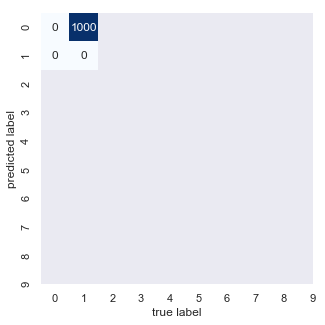

In [13]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

In [14]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00      1000

   micro avg       0.00      0.00      0.00      1000
   macro avg       0.00      0.00      0.00      1000
weighted avg       0.00      0.00      0.00      1000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit